In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from scipy.optimize import root

from support.charting import save_fig

from IPython.core import display as ICD

In [8]:
sns.set_style('white')

def fun(x):
    return [(x[0]**qq)/(1+x[0]**qq) - bb*x[0]]

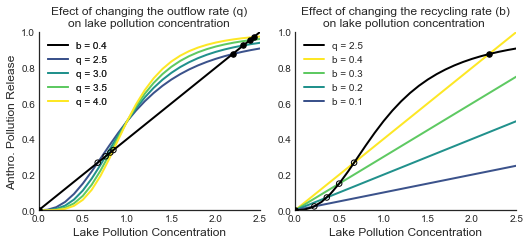

In [37]:
b = [0.4,0.3,0.2,0.1]
q = [2.5,3,3.5,4]

x = np.arange(0,2.6,0.1)
y = np.zeros(len(x))

cmap = mpl.cm.get_cmap('viridis')

fig = plt.figure(figsize=(7.5, 3.5))
ax = fig.add_subplot(1,2,1)

colors = []
for i in range(len(b)):
    colors.append(cmap(0.25*(i+1)))

lines=[]
line1, = ax.plot(x,b[0]*x,c='k', linewidth=2,zorder=2)
lines.append(line1)
for j in range(len(q)):
    for i in range(len(x)):
        y[i] = (x[i]**q[j])/(1+x[i]**q[j])
        
    line1, = ax.plot(x, y, c = colors[j], linewidth=2,zorder=1)
    lines.append(line1)
    bb = b[0]
    qq = q[j]
    soln = root(fun,1.0)
    lines.append(ax.scatter(soln.x,b[0]*soln.x,facecolor='none',edgecolor='k',s=30,zorder=3))
    soln = root(fun,2.5)
    lines.append(ax.scatter(soln.x,b[0]*soln.x,facecolor='k',edgecolor='k',s=30,zorder=3))

lines.append(ax.scatter(0,0,facecolor='k',edgecolor='k',s=30,zorder=3))
legend1 = plt.legend([lines[0], lines[1], lines[4], lines[7], lines[10]],\
    ['b = 0.4', 'q = 2.5', 'q = 3.0', 'q = 3.5', 'q = 4.0'], loc='upper left')
plt.setp(legend1.get_title(),fontsize=14)
plt.gca().add_artist(legend1)
ax.set_ylabel('Anthro. Pollution Release',fontsize=12)
ax.set_xlabel('Lake Pollution Concentration',fontsize=12)
ax.tick_params(axis='y',labelsize=10)
ax.set_xlim(0,2.5)
ax.set_ylim(0,1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Efect of changing the outflow rate (q)\non lake pollution concentration',loc='center')

ax = fig.add_subplot(1,2,2)
colors = []
for i in range(len(b)):
    colors.append(cmap(1-(0.25*i)))

for i in range(len(x)):
    y[i] = x[i]**q[0]/(1+x[i]**q[0])

lines = []
line1, = ax.plot(x,y,c='k',label='q = ' + str(q[0]),linewidth=2,zorder=2)
lines.append(line1)
for i in range(len(b)):        
    line1, = ax.plot(x,b[i]*x,c=colors[i],label='b = ' + str(b[i]),linewidth=2,zorder=1)
    lines.append(line1)
    bb = b[i]
    qq = q[0]
    soln = root(fun,1.0)
    lines.append(ax.scatter(soln.x,b[i]*soln.x,facecolor='none',edgecolor='k',s=30,zorder=3))
    soln = root(fun,2.5)
    lines.append(ax.scatter(soln.x,b[i]*soln.x,facecolor='k',edgecolor='k',s=30,zorder=3))

lines.append(ax.scatter(0,0,facecolor='k',edgecolor='k',s=30,zorder=3))
ax.legend([lines[0], lines[1], lines[4], lines[7], lines[10]],\
    ['q = 2.5', 'b = 0.4', 'b = 0.3', 'b = 0.2', 'b = 0.1'],\
    scatterpoints = 1, loc='upper left')
ax.set_xlabel('Lake Pollution Concentration',fontsize=12)
# ax.set_ylabel('Anthro. Pollution Release',fontsize=12)
ax.tick_params(axis='both',labelsize=10)
ax.set_xlim(0,2.5)
ax.set_ylim(0,1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Effect of changing the recycling rate (b)\non lake pollution concentration ',loc='center')
plt.tight_layout()
save_fig(fig, 'images/', 'tippingpoint')
plt.show()